<a href="https://colab.research.google.com/github/Srivardini11/lark/blob/main/kplr004543923.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install**

In [1]:
!pip install lightkurve --quiet

     |████████████████████████████████| 247 kB 14.3 MB/s 
     |████████████████████████████████| 4.5 MB 26.7 MB/s 
     |████████████████████████████████| 98 kB 7.5 MB/s 
     |████████████████████████████████| 41 kB 198 kB/s 
     |████████████████████████████████| 832 kB 44.8 MB/s 
     |████████████████████████████████| 54 kB 2.6 MB/s 
     |████████████████████████████████| 3.6 MB 45.2 MB/s 


# **Import**

In [2]:
import matplotlib.pyplot as plt
import matplotlib 
import lightkurve as lk
import numpy as np
from astropy.convolution import convolve, Box1DKernel

matplotlib.rcParams['figure.figsize'] = (15,8)

# The Source

In [11]:
source = lk.search_lightcurve("kplr004543923", author="Kepler", cadence="long",quarter = 9).download()
source

time,flux,flux_err,quality,timecorr,centroid_col,centroid_row,cadenceno,sap_flux,sap_flux_err,sap_bkg,sap_bkg_err,pdcsap_flux,pdcsap_flux_err,sap_quality,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
,electron / s,electron / s,,d,pix,pix,,electron / s,electron / s,electron / s,electron / s,electron / s,electron / s,,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix
object,float32,float32,int32,float32,float64,float64,int32,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
808.5160512279908,nan,nan,0,-9.071920e-04,168.25754,978.03335,34237,2.8926575e+05,1.4444117e+01,2.2944604e+03,6.3708836e-01,nan,nan,0,168.24336,2.5153926e-05,978.02226,3.4493518e-05,168.25754,4.1478437e-05,978.03335,5.1555675e-05,2.5990098e-03,-5.6573071e-02
808.5364855876032,3.0878866e+05,1.5392541e+01,0,-9.064324e-04,168.25745,978.03344,34238,2.8931834e+05,1.4445169e+01,2.2936467e+03,6.3752663e-01,3.0878866e+05,1.5392541e+01,0,168.24331,2.5143992e-05,978.02252,3.4502147e-05,168.25745,4.1467203e-05,978.03344,5.1532839e-05,2.5218811e-03,-5.6346618e-02
808.5569199473903,3.0877038e+05,1.5389178e+01,0,-9.056726e-04,168.25756,978.03366,34239,2.8927534e+05,1.4444263e+01,2.2942329e+03,6.3765359e-01,3.0877038e+05,1.5389178e+01,0,168.24343,2.5153413e-05,978.02271,3.4513738e-05,168.25756,4.1480758e-05,978.03366,5.1543517e-05,2.6032226e-03,-5.6098036e-02
808.5773543074029,3.0881950e+05,1.5388979e+01,0,-9.049126e-04,168.25717,978.03371,34240,2.8932350e+05,1.4445218e+01,2.2931799e+03,6.3737261e-01,3.0881950e+05,1.5388979e+01,0,168.24322,2.5146250e-05,978.02301,3.4522654e-05,168.25717,4.1475738e-05,978.03371,5.1520925e-05,2.4010465e-03,-5.5765621e-02
808.5977886675973,3.0879072e+05,1.5399478e+01,0,-9.041524e-04,168.25758,978.03410,34241,2.8932266e+05,1.4443922e+01,2.2929409e+03,6.3760614e-01,3.0879072e+05,1.5399478e+01,0,168.24346,2.5139685e-05,978.02346,3.4538112e-05,168.25758,4.1464038e-05,978.03410,5.1511382e-05,2.5878288e-03,-5.5410273e-02
808.6182231280254,3.0875966e+05,1.5391477e+01,0,-9.033920e-04,168.25730,978.03427,34242,2.8931331e+05,1.4443742e+01,2.2934373e+03,6.3690788e-01,3.0875966e+05,1.5391477e+01,0,168.24335,2.5137948e-05,978.02357,3.4545061e-05,168.25730,4.1471711e-05,978.03427,5.1518506e-05,2.4283198e-03,-5.5266581e-02
808.6386574886201,3.0873675e+05,1.5401358e+01,0,-9.026314e-04,168.25742,978.03455,34243,2.8932172e+05,1.4443890e+01,2.2945886e+03,6.3747233e-01,3.0873675e+05,1.5401358e+01,0,168.24350,2.5136751e-05,978.02407,3.4567431e-05,168.25742,4.1471121e-05,978.03455,5.1505252e-05,2.5247904e-03,-5.4741815e-02
808.6590917494541,3.0869275e+05,1.5406428e+01,0,-9.018705e-04,168.25733,978.03465,34244,2.8930062e+05,1.4443393e+01,2.2915386e+03,6.3713437e-01,3.0869275e+05,1.5406428e+01,0,168.24341,2.5132011e-05,978.02437,3.4579974e-05,168.25733,4.1470470e-05,978.03465,5.1496394e-05,2.4844147e-03,-5.4396901e-02


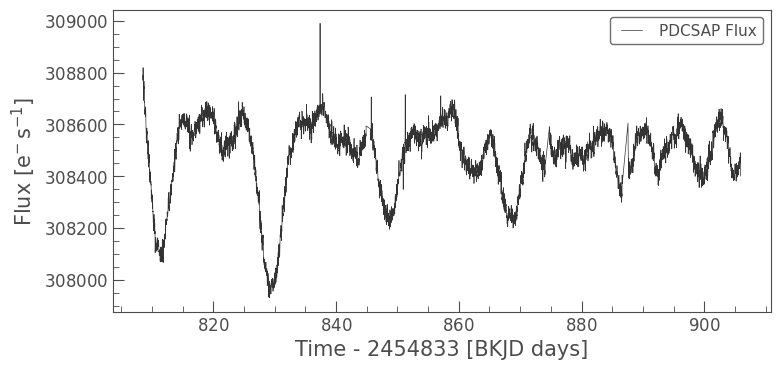

In [12]:
source.plot(label='PDCSAP Flux', normalize=False)

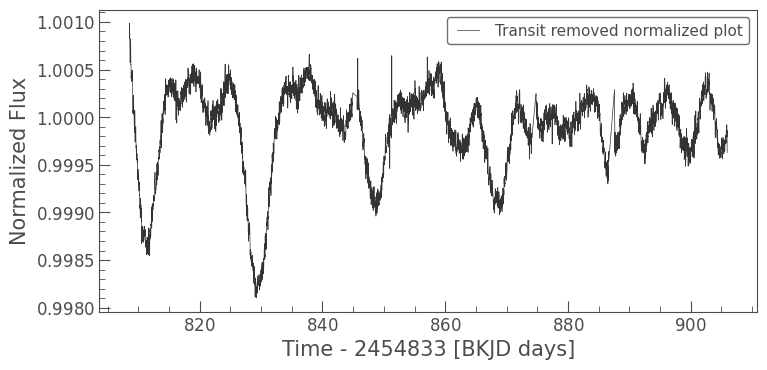

In [13]:
rem_out=source.remove_outliers(sigma_upper = 2.5).normalize()
rem_out.plot(label='Transit removed normalized plot', normalize = True)

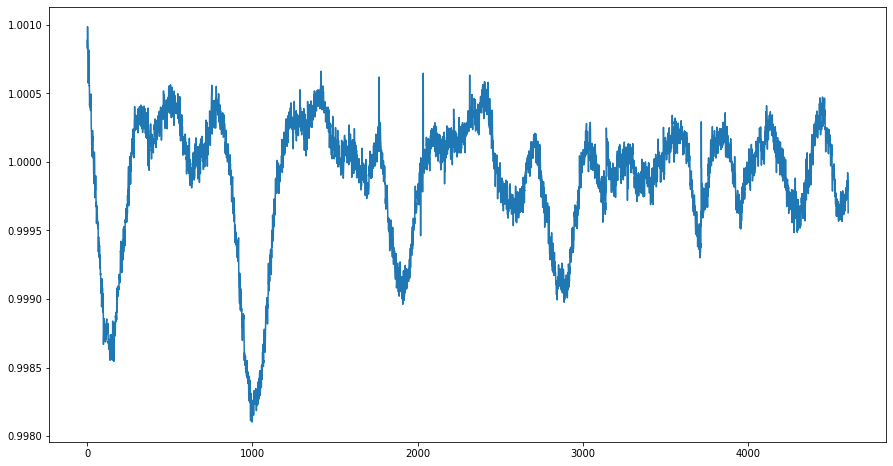

In [14]:
flux = rem_out.flux.value
time = rem_out.time.value
plt.figure(figsize=(15,8))
plt.plot(flux)

In [15]:
smoothed_signal = convolve(flux, Box1DKernel(16))

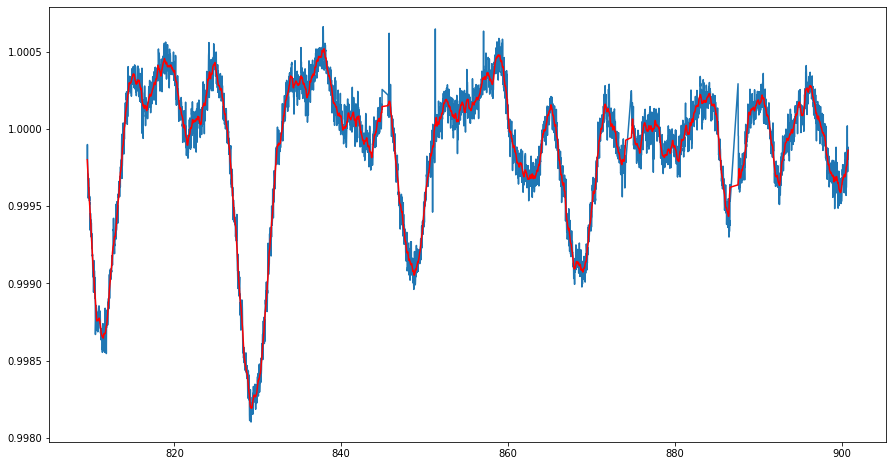

In [16]:
index = 50
ind = 250
plt.plot(time[index:-ind],flux[index:-ind])
plt.plot(time[index:-ind], smoothed_signal[index:-ind],color='red')

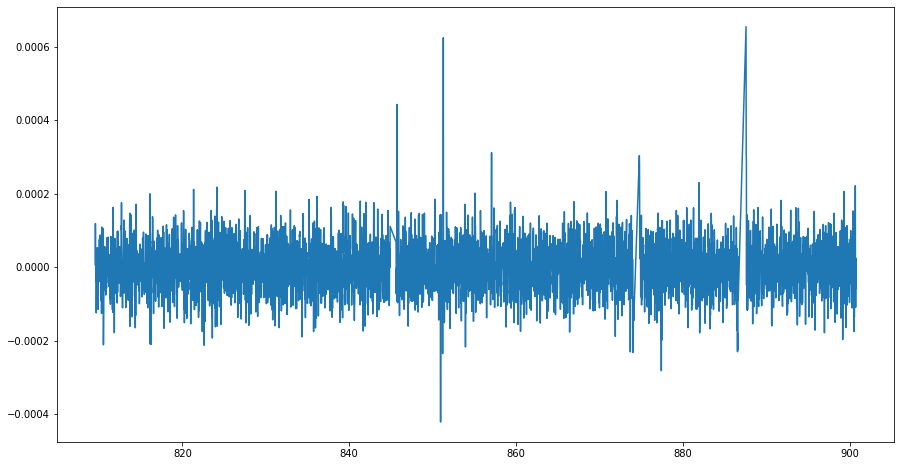

In [17]:
flkr=flux[index:-ind]-smoothed_signal[index:-ind]
plt.figure(figsize=(15,8))
plt.plot(time[index:-ind],flkr)

In [18]:
np.sqrt(np.mean(flkr**2))/1e-3

0.07015985465841368